In [133]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
import seaborn as sns
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor, VotingRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

In [134]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """
    # дописать документация
    Выводить R2 и строит графики для оценки качества модели
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))

    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [135]:
TRAIN_DATASET_PATH = './Курсач/train.csv'
TEST_DATASET_PATH = './Курсач/test.csv'

In [136]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [137]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [138]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

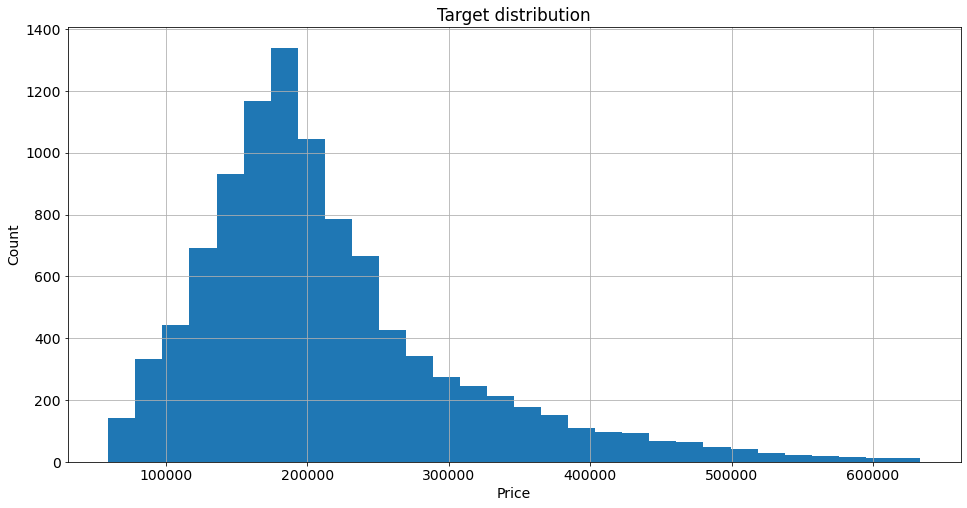

In [139]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

In [140]:
train_df.describe() #переменные

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [141]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [142]:
train_df = reduce_mem_usage(train_df)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.82 MB
Decreased by 46.0%


In [143]:
df_num_features = train_df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,Ecology_1,Healthcare_1,Price
0,3.0,115.027313,NaN,10.0,10.0,0.075424,NaN,305018.875000
1,1.0,39.832523,23.169222,8.0,8.0,0.118537,1183.0,177734.546875
2,3.0,78.342216,47.671970,10.0,17.0,0.025609,240.0,282078.718750
3,1.0,40.409908,NaN,1.0,22.0,0.007122,NaN,168106.000000
4,2.0,64.285065,38.562515,9.0,16.0,0.282798,NaN,343995.093750
...,...,...,...,...,...,...,...,...
9995,2.0,49.090729,33.272625,6.0,12.0,0.300323,NaN,119367.453125
9996,2.0,64.307686,37.038422,9.0,0.0,0.072158,NaN,199715.156250
9997,1.0,29.648056,16.555363,5.0,5.0,0.460556,NaN,165953.906250
9998,1.0,32.330292,22.326870,5.0,9.0,0.194489,125.0,171842.406250


In [144]:
train_df.dtypes

Id               category
DistrictId       category
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
dtype: object

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>],
       [<AxesSubplot:title={'center':'KitchenSquare'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>],
       [<AxesSubplot:title={'center':'Healthcare_1'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

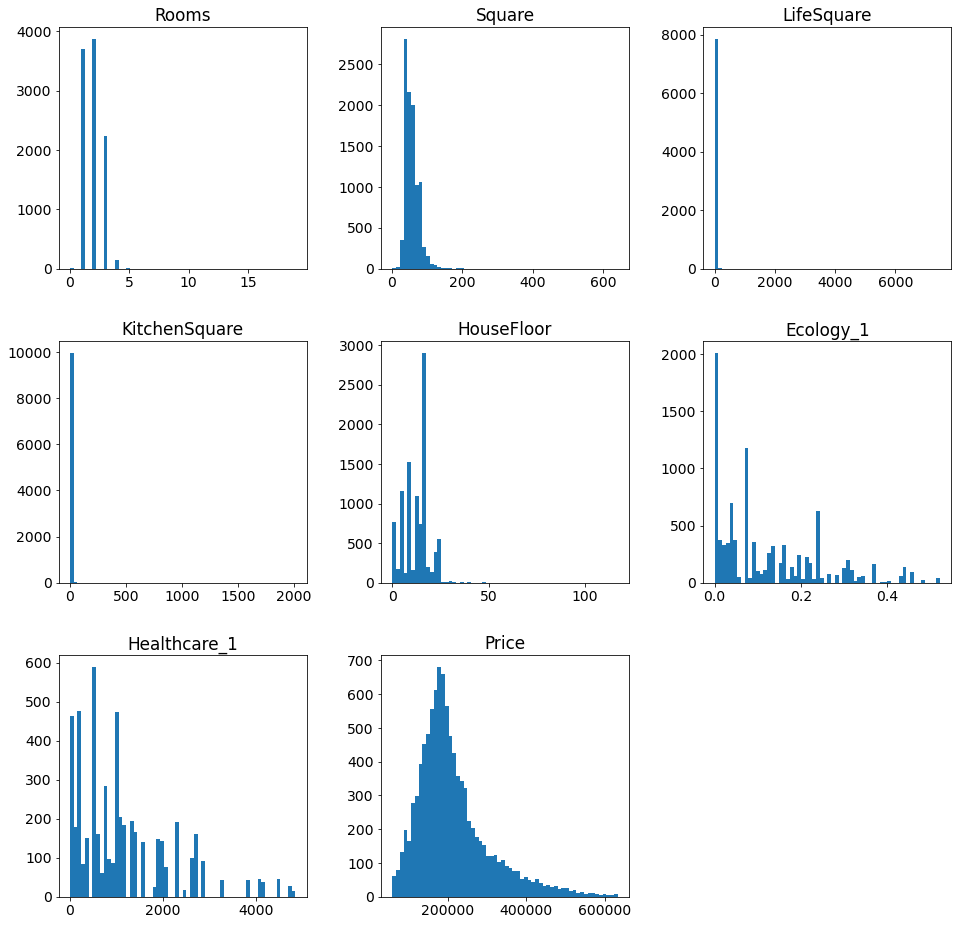

In [145]:
df_num_features.hist(figsize=(16,16), bins=60, grid=False)

In [146]:
train_df.select_dtypes(include='category').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [147]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile_max = None
        self.kitchen_square_quantile_min = None
        
        self.square_quantile_max = None
        self.square_quantile_min = None
        
        self.life_square_quantile_max = None
        self.life_square_quantile_min = None

     
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile_max = X['KitchenSquare'].quantile(.975)
        self.kitchen_square_quantile_min = X['KitchenSquare'].quantile(.025)
        
        self.square_quantile_max = X['Square'].quantile(.975)
        self.square_quantile_min = X['Square'].quantile(.025)
        
        self.life_square_quantile_max = X['LifeSquare'].quantile(.975)
        self.life_square_quantile_min = X['LifeSquare'].quantile(.025)
        

        
    
    def transform(self, X):
        """Трансформация данных"""
        
        # Rooms
        X.loc[(train_df['Rooms'] <= 0) | (X['Rooms'] > 6), 'Rooms'] = self.medians['Rooms']
        
        #SQUARE
        X.loc[(X['Square'] > self.square_quantile_max),'Square'] = self.square_quantile_max
        X.loc[(X['Square'] < self.square_quantile_min),'Square'] = self.square_quantile_min
        X.loc[train_df['Square'].isna(), 'Square'] = self.medians['Square']
        
        #KITCHEN_SQUARE
        X.loc[X['KitchenSquare'] < 3 , 'KitchenSquare'] = 3
        X.loc[(X['KitchenSquare'] > self.kitchen_square_quantile_max) | (X['KitchenSquare'].isna()), 'KitchenSquare'] = self.medians['KitchenSquare']
        
        
        #LIFE_SQUARE
        X.loc[(X['LifeSquare'] > X['Square']) | (X['LifeSquare'].isna()), 'LifeSquare'] = self.medians['LifeSquare']
        X.loc[X['LifeSquare'] < self.life_square_quantile_min, 'LifeSquare'] = self.life_square_quantile_min
        X.loc[X['LifeSquare'] > X['Square'], 'LifeSquare'] = X['LifeSquare'] - (X['KitchenSquare'])*2
        
        
        #FLOOR and HOUSE_FLOOR 
        X.loc[X['Floor'] > X['HouseFloor'], 'Floor'] = X['HouseFloor']
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
       

        #House_Year
        today = date.today()
        X.loc[X['HouseYear'] > int(today.strftime("%Y")), 'HouseYear'] = int(today.strftime("%Y"))
        
  
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        
        #Ecology_2
        if 'Ecology_2' in X.columns:
            X.drop('Ecology_2', axis = 1, inplace=True)

        #Ecology_3
        if 'Ecology_3' in X.columns:
            X.drop('Ecology_3', axis = 1, inplace=True)    
        
        X.fillna(self.medians, inplace=True)
        
        #Binary
        X['Shops_2'] = X['Shops_2'].replace(binary_to_numbers)
        
        #ID drop
        if 'Id' in X.columns:
            X.drop('Id', axis=1, inplace=True)
        
        return X

Признаки

In [148]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [149]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

target_name = 'Price'

Разбиение на train и test

In [150]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [151]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=21)

In [152]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((7000, 15), (3000, 15), (5000, 15))

In [153]:
X_train = X_train[feature_names]
X_valid = X_valid[feature_names]
test_df = test_df[feature_names]

Построение модели RandomForestRegressor

In [51]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

Train R2:	0.96
Test R2:	0.728


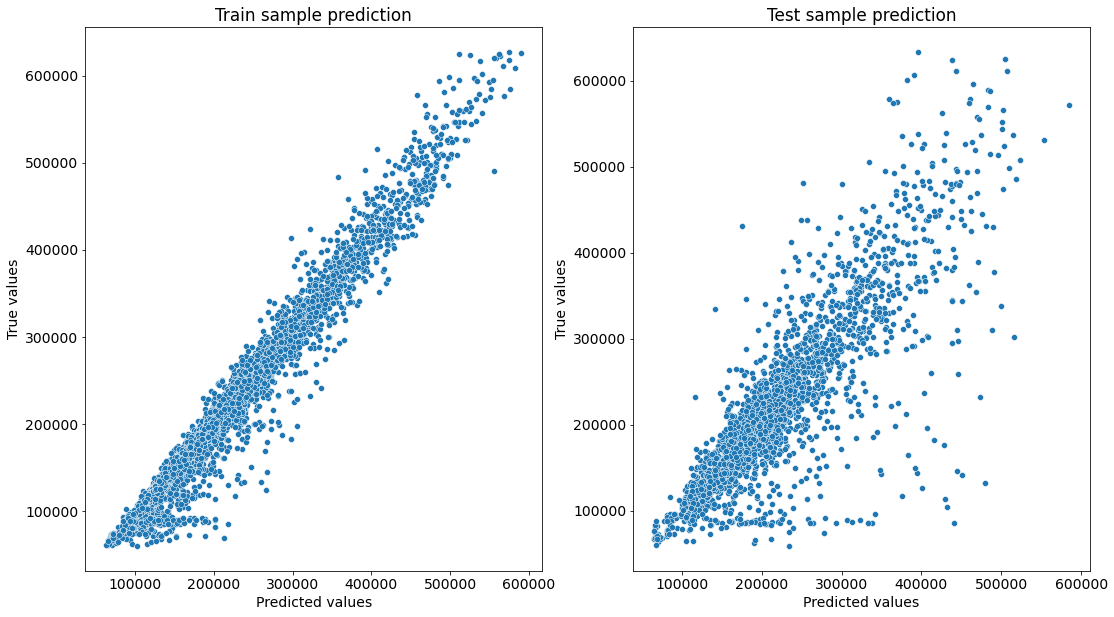

In [52]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

Построение модели RandomForestRegressor 2

In [74]:

rf_model2 = RandomForestRegressor(n_estimators=1000, max_depth = 12, random_state=41)
rf_model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

Train R2:	0.895
Test R2:	0.73


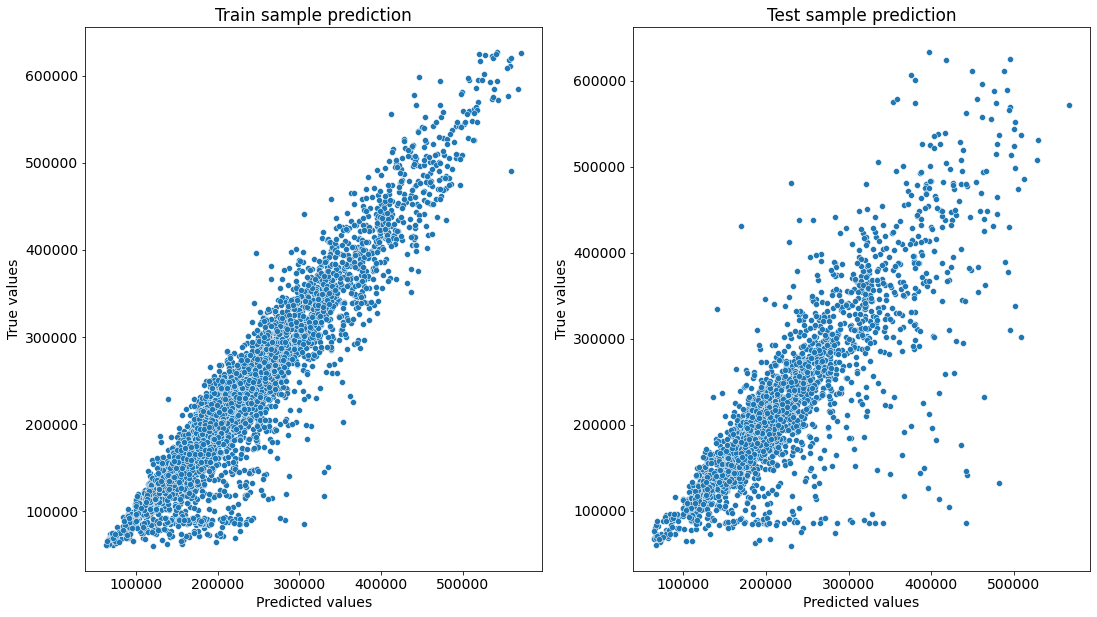

In [75]:
y_train_preds = rf_model2.predict(X_train)
y_test_preds = rf_model2.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

Построение модели StackingRegressor 

In [119]:
%%time
lr = LinearRegression()
gb = GradientBoostingRegressor(criterion='mse',
                                        max_depth=3,
                                        min_samples_leaf=5,  
                                        n_estimators=300)

stack = StackingRegressor([('lr', lr), ('rf', rf_model)], final_estimator=gb)
stack.fit(X_train, y_train)

Wall time: 16.8 s


StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=21))],
                  final_estimator=GradientBoostingRegressor(criterion='mse',
                                                            min_samples_leaf=5,
                                                            n_estimators=300))

Train R2:	0.946
Test R2:	0.716


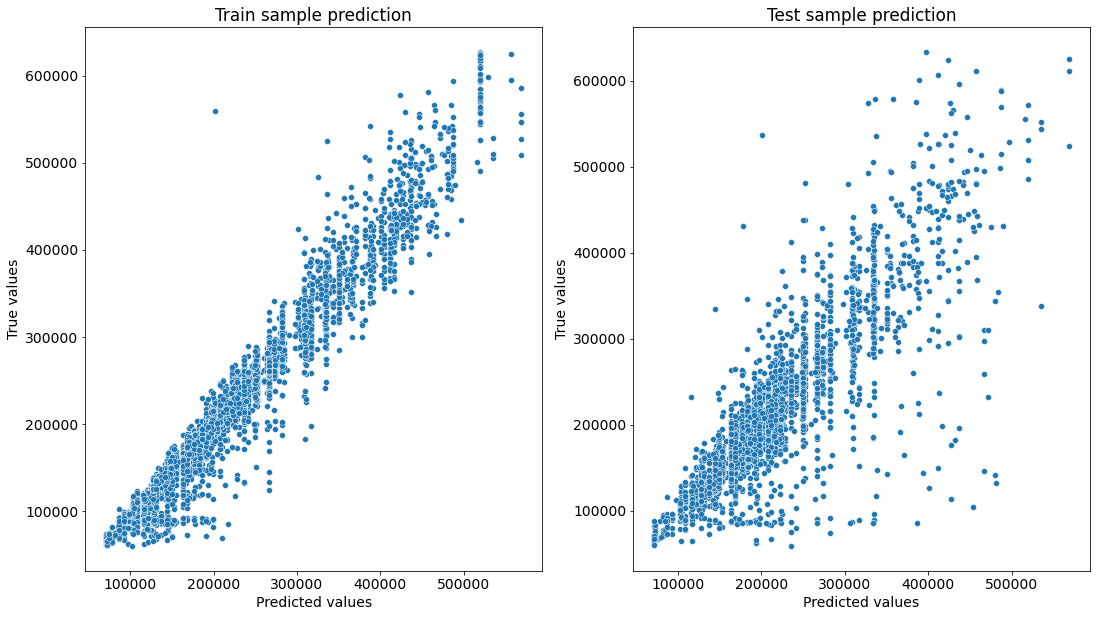

In [120]:
y_train_preds = stack.predict(X_train)
y_test_preds = stack.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

Построение модели GradientBoostingRegressor (0,755) 

In [182]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                        max_depth=7,
                                        min_samples_leaf=15,
                                        random_state=42,  
                                        n_estimators= 300, 
                                        max_features='sqrt', 
                                        loss='huber', 
                                        learning_rate=0.05)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.05, loss='huber',
                          max_depth=7, max_features='sqrt', min_samples_leaf=15,
                          n_estimators=300, random_state=42)

Train R2:	0.853
Test R2:	0.764


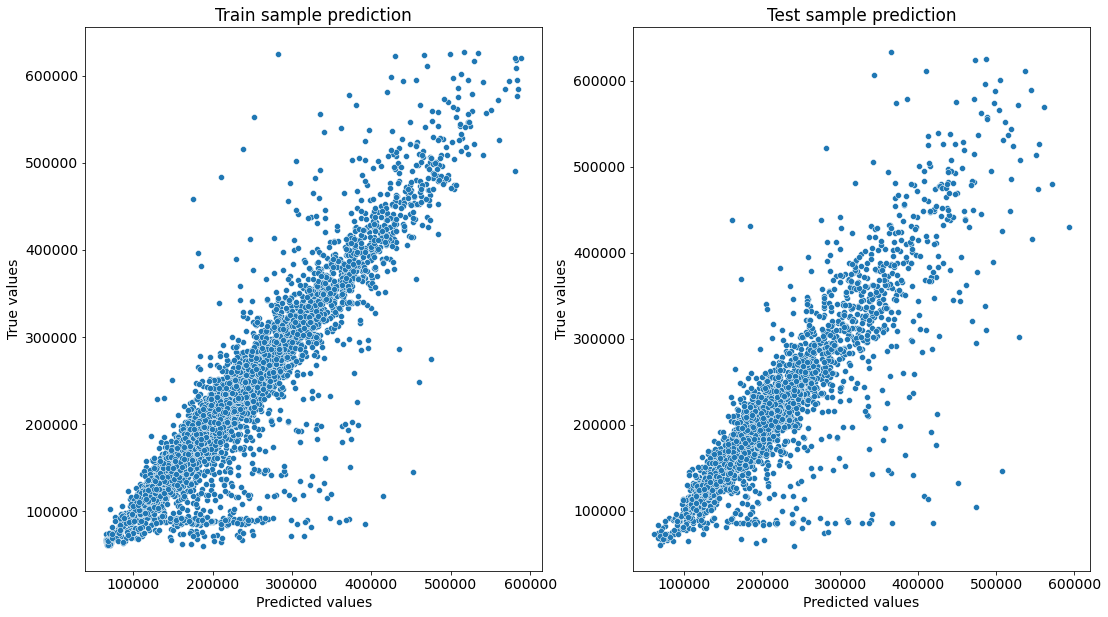

In [183]:
y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [184]:
submit = pd.read_csv('./Курсач/sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [185]:
predictions = gb_model.predict(test_df)
predictions

array([162095.93357743, 124591.25487458, 145583.33742404, ...,
       147964.80591662, 194784.03688452, 276413.70939757])

In [186]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,162095.933577
1,5925,124591.254875
2,960,145583.337424
3,3848,118109.455173
4,746,215972.736913


In [187]:
submit.to_csv('./Курсач/gb2_submitt.csv', index=False)